# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


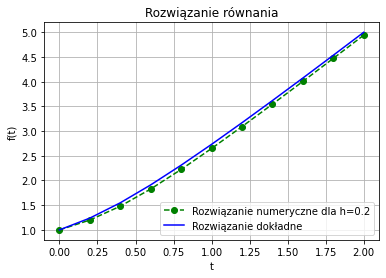

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import main

f = lambda t, x: (x+t)/(x-t)
h = 0.2
t = np.arange(0, 2+h, h)
y0 = [1]

s_new = main.solve_euler(f, t, y0, h)
plt.plot(t, s_new, 'go--', label=f'Rozwiązanie numeryczne dla h={h}')
plt.plot(t, t + np.sqrt(1 + 2*t**2), 'b', label='Rozwiązanie dokładne')
plt.title('Rozwiązanie równania')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

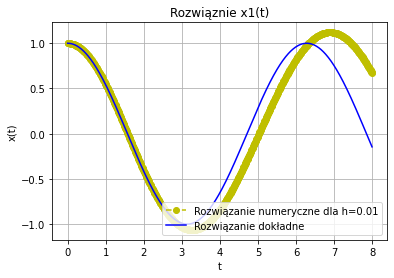

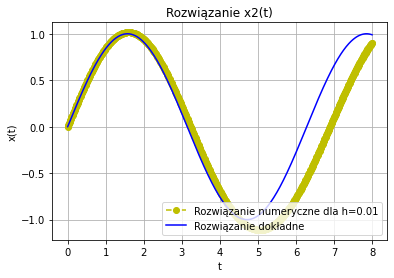

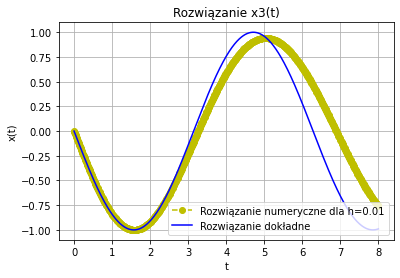

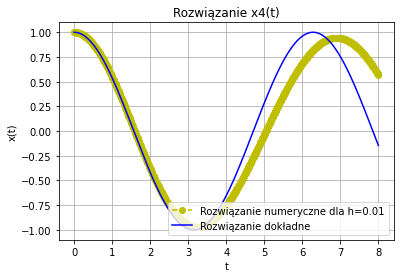

In [84]:
def rownanie(t, x):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0] / ((x[0]**2 + x[1]**2)**(3/2))
    x4 = -x[1] / ((x[0]**2 + x[1]**2)**(3/2))
    return np.array([x1, x2, x3, x4])

x0 = np.array([1, 0, 0, 1]) #warunki początkowe
h = 0.01
t = np.arange(0, 8+h, h)

k = main.solve_euler(rownanie, t, x0, h)

plt.plot(t, k[:, 0], 'yo--', label=f'Rozwiązanie numeryczne dla h={h}')
plt.plot(t, np.cos(t), 'b', label='Rozwiązanie dokładne')
plt.grid()
plt.xlabel('t'), plt.ylabel('x(t)')
plt.title('Rozwiąznie x1(t)')
plt.legend(loc='lower right')
plt.show()

plt.plot(t, k[:, 1], 'yo--', label=f'Rozwiązanie numeryczne dla h={h}')
plt.plot(t, np.sin(t), 'b', label='Rozwiązanie dokładne')
plt.grid()
plt.xlabel('t'), plt.ylabel('x(t)')
plt.title('Rozwiązanie x2(t)')
plt.legend(loc='lower right')
plt.show()

plt.plot(t, k[:, 2], 'yo--', label=f'Rozwiązanie numeryczne dla h={h}')
plt.plot(t, -np.sin(t), 'b', label='Rozwiązanie dokładne')
plt.grid()
plt.xlabel('t'), plt.ylabel('x(t)')
plt.title('Rozwiązanie x3(t)')
plt.legend(loc='lower right')
plt.show()

plt.plot(t, k[:, 3], 'yo--', label=f'Rozwiązanie numeryczne dla h={h}')
plt.plot(t, np.cos(t), 'b', label='Rozwiązanie dokładne')
plt.grid()
plt.xlabel('t'), plt.ylabel('x(t)')
plt.title('Rozwiązanie x4(t)')
plt.legend(loc='lower right')
plt.show()

Możemy zauważyć, że im mniejszy krok h tym nasze rozwiązanie numeryczne bardziej dopasowuje się do rozwiązania dokładnego. 

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

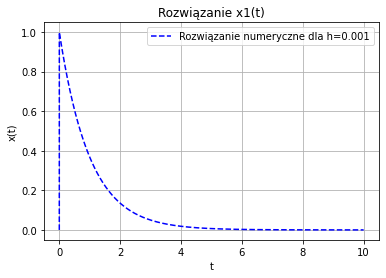

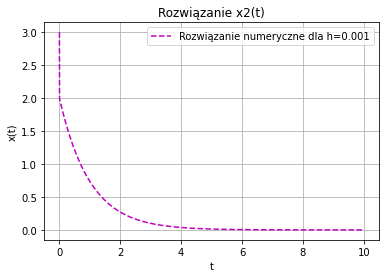

In [171]:
def macierz_a(t, x): 
    A = np.array([[-667, 333],
                 [666, -334]])
    return np.dot(A, x)

x01 = np.array([0, 3])
h1 = 0.001
t1 = np.arange(0, 10+h1, h1)

k = main.solve_euler(macierz_a, t1, x01, h1)

plt.plot(t1, k[:, 0], 'b--', label=f'Rozwiązanie numeryczne dla h={h1}')
plt.grid()
plt.title('Rozwiązanie x1(t)')
plt.legend(loc='upper right')
plt.xlabel('t'), plt.ylabel('x(t)')
plt.show()

plt.plot(t1, k[:, 1], 'm--', label=f'Rozwiązanie numeryczne dla h={h1}')
plt.grid()
plt.title('Rozwiązanie x2(t)')
plt.legend(loc='upper right')
plt.xlabel('t'), plt.ylabel('x(t)')
plt.show()

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

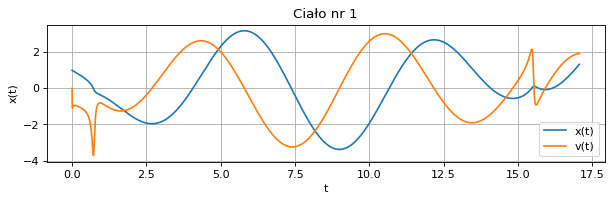

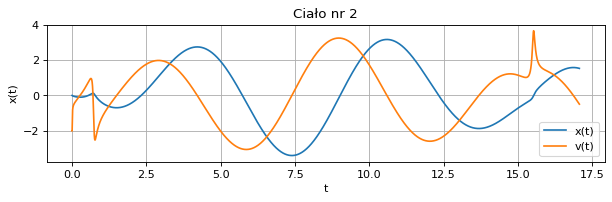

In [182]:
from matplotlib.pyplot import figure

def arenstorf_orbit(t, x):
    mu = 0.012277471
    mu_prim = 1 - mu
    D1 = ((x[0] + mu)**2 + x[2]**2)**(3/2)
    D2 = ((x[0] - mu_prim)**2 + x[2]**2)**(3/2)
    
    x1 = x[1]
    x2 = x[0] + 2*x[3] - mu_prim*(x[0] + mu)/D1 - mu*(x[0] - mu_prim)/D2
    x3 = x[3]
    x4 = x[2] - 2*x[1] - mu_prim*x[2]/D1 -  mu*x[2]/D2
    
    return np.array([x1, x2, x3, x4])
    
x02 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
T = 17.0652165601579625588917206249
h2 = 0.001
t2 = np.arange(0, T+h2, h2)

result = main.solve_euler(arenstorf_orbit, t2, x02, h2)

figure(num=None, figsize=(9, 5), dpi=80, facecolor='w')
plt.subplot(2, 1, 1)
plt.plot(t2, result[:, 0])
plt.plot(t2, result[:, 1])
plt.grid()
plt.title('Ciało nr 1')
plt.xlabel('t'), plt.ylabel('x(t)')
plt.legend(["x(t)", "v(t)"], loc='lower right')
plt.show()

figure(num=None, figsize=(9, 5), dpi=80, facecolor='w')
plt.subplot(2, 1, 2)
plt.plot(t2, result[:, 2])
plt.plot(t2, result[:, 3])
plt.grid()
plt.title('Ciało nr 2')
plt.xlabel('t'), plt.ylabel('x(t)')
plt.legend(["x(t)", "v(t)"], loc='lower right')
plt.show()

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
